# Fundamentos de Big Data.

## Autor: Victor Simo Lozano

## Actividad 3
<p>Trabajar con los principales tipos de gráficos en Python.<br>
- Historgramas.<br>- Scatter.<br>- Pie charts.<br>- 3D.</p>
    

<hr style="border-color:red">

<h3>SOLUCION</h3>

<div style="font-size:14px; text-align:justify"><b>PRIMERA PARTE.-</b><br>
    <p>Realizar una sere de gráficos similares a los vistos en el manual, empleando, a ser posible, ejemplos diferentes.</p>
    </div>

In [1]:
# Importaciones a nivel global
import pandas as pd
import numpy as np

<p style="text-align:center"><b>HISTOGRAMA</b></p>
<p>Para realizar la implemtación de un gráfico de este tipo, se va a emplear la libreria <b>Bokeh</b> vista en la actividad anterior por su gran potencial para el análisis de datos.<br>En esta ocasión, el set de datos a analizar se ha extraído de Kaggle, el cual se refiere a un estudio de actividad de un grupo de 30 personas que emplean un reloj de actividad. En concreto, se va a comprar las horas/dia de actividad frente a las de actividad.</p>

In [2]:
# Importaciones Bokeh
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, HoverTool

In [3]:
df = pd.read_csv('Activity summary.csv')
df.head()

,Id,ActivityDay,TotalDistance,TotalActiveHours,SedentaryHours
0,1624580081,01/05/2016,28,7.00,17.00
1,8877689391,30/04/2016,27,5.85,18.15
2,1503960366,12/05/2016,0,0.00,24.00
3,1844505072,19/04/2016,0,0.17,23.83
4,1844505072,20/04/2016,0,0.02,23.98


<p style="font-size:12px"><b>Fuente: </b><a href="https://www.kaggle.com/datasets/shivideveshwar/fitbit-data-analysis?select=Activity+Summary.csv">Kaggle</a></p>

<p>Para la comparación, se comprueba que ambas columnas poseen la misma cantidad de datos para más adelante crear el mismo "bin" de datos con la librería Numpy.</p>

In [4]:
n_horas_sedentarismo = df['SedentaryHours'].count()
n_horas_actividad = df['TotalActiveHours'].count()

print(f'Datos sedentarismo: {n_horas_sedentarismo}\nDatos actividad: {n_horas_actividad}')

Datos sedentarismo: 940
Datos actividad: 940


In [5]:
BIN_PERC = 10 

# Preparar el histograma de los datos. Bokeh no posee un glyph especifico para histogramas.
sed_hist, sed_edges = np.histogram(df['SedentaryHours'], 
                               bins = int(940*(BIN_PERC/100)))
act_hist, act_edges = np.histogram(df['TotalActiveHours'], 
                               bins = int(940*(BIN_PERC/100)))

# Crear el dataframe con los datos a plotear
sedentarismo = pd.DataFrame({'horas': sed_hist, 
                       'left': sed_edges[:-1], 
                       'right': sed_edges[1:]})
actividad = pd.DataFrame({'horas': act_hist, 
                       'left': act_edges[:-1], 
                       'right': act_edges[1:]})

# Convertimos los dataframe a ColumnDataSource para Bokeh
sed = ColumnDataSource(sedentarismo)
act = ColumnDataSource(actividad)

In [6]:
# Análisis de la diferencia entre los tipos de datos para su uso en Bokeh y por ende la necesidad de este paso.
print(sed.data.keys())
print(sedentarismo.keys())

dict_keys(['index', 'horas', 'left', 'right'])
Index(['horas', 'left', 'right'], dtype='object')


In [7]:
# Esto nos permitirá visualizar el ploteo en el entorno de Jupyter.
output_notebook()

Loading BokehJS ...

Una vez tenemos todos los datos necesarios para nuestro histograma, desarrollamos el codigo para el ploteo de los datos.

In [8]:
# Crear el objeto de ploteo
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Sedentarismo VS Actividad',
           background_fill_color="#fafafa",
           x_axis_label = 'h/dia', 
           y_axis_label = 'frecuencia')

# Añadir las gráficas deseadas
# Se puede emplear el ColumnDataSource de modo que Bokeh tenga acceso a los datos a plotear
p.quad(source=sed, bottom=0, top='horas', 
       left='left', right='right', 
       fill_color='red', line_color='black',
       legend_label='Horas Sedentarismo',
       alpha=0.5)
p.quad(source=act, bottom=0, top='horas', 
       left='left', right='right', 
       fill_color='navy', line_color='black',
       legend_label='Horas Actividad',
       alpha=0.5)

# Parametrizacion de la leyenda
p.legend.click_policy="hide"

# Añadir herramienta "hover"
hover = HoverTool(tooltips = [('horas/dia', 'de @left a @right)'),
                              ('frecuencia', '@horas')])

p.add_tools(hover)

# Show the plot
show(p)

<hr style="border-color:black">

<p style="text-align:center"><b>SCATTER</b></p>
<p>Para realizar la implemtación de un gráfico de este tipo, se va a emplear la libreria <b>Plotnine</b> vista en la actividad anterior por su gran sencillez para realizar los gráficos.<br>En esta ocasión, el set de datos a analizar se ha extraído de Kaggle, el cual se refiere al analisis de los decesos en India. Para este caso en concreto, se va a realizar el analisis de los decesos de hombres y mujeres por tipo de enfermedad.</p>

In [9]:
# Importaciones Plotnine
from plotnine import ggplot, geom_point, aes, xlab, ylab, ggtitle, theme

In [10]:
df_0 = pd.read_csv('Deathdata.csv')

df_0.head()

,Diseases,Deaths,Male,Female,0-4,5-14,15-29,30-44,45-54,55-69,70,Total
0,Tuberculosis,6845,4624,2221,46,71,612,1382,1270,2224,1240,6845
1,HIV/AIDS,425,299,126,0,3,72,234,70,46,0,425
2,Diarrhoeal,9361,4390,4971,1959,392,456,425,427,1915,3787,9361
3,Malaria,3621,1796,1825,456,260,442,400,313,826,924,3621
4,Selected tropical,771,398,373,46,50,96,100,87,192,200,771


<p style="font-size:12px"><b>Fuente: </b><a href="https://www.kaggle.com/datasets/abhisheksubhashswami/death-analysis?select=Deathdata.csv">Kaggle</a></p>

Como se ha mencionado, se va a comparar los datos de decesos de hombres y mujeres por lo que se prepara el set de datos

In [11]:
df = df_0[['Diseases','Male', 'Female']]

df.head()

,Diseases,Male,Female
0,Tuberculosis,4624,2221
1,HIV/AIDS,299,126
2,Diarrhoeal,4390,4971
3,Malaria,1796,1825
4,Selected tropical,398,373


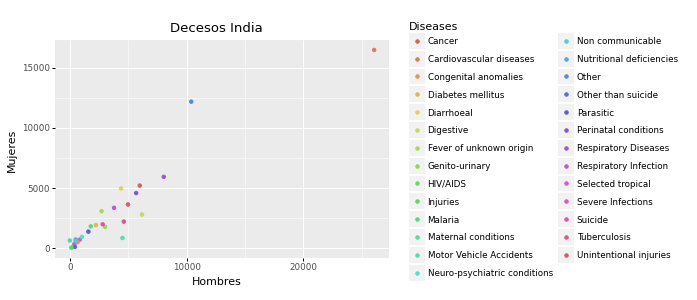

<ggplot: (156680621433)>

In [12]:
# Definicion de la grafica
edad_confort = (ggplot(data=df,
                     mapping=aes(x='Male',
                                 y='Female',
                                 color='Diseases'))+
                xlab('Hombres')+
                ylab('Mujeres')+
                ggtitle('Decesos India')+
                theme(figure_size=(10, 10)))

# Ploteo de la grafica
edad_confort + geom_point()

<hr style="border-color:black">

<p style="text-align:center"><b>PIE CHART</b></p>
<p>Para realizar la implemtación de un gráfico de este tipo, se va a emplear la libreria <b>Matplotlib</b> por su gran rapidez a la hora de generar gráficos.<br>En esta ocasión, el set de datos a analizar se ha extraído de Kaggle, el cual se refiere los datos de una encuesta realizada a pasajeros de una aerolinea, el objetivo es mostrar los 3 puntos que requiere mejorar la empresa.</p>

In [13]:
# Importaciones Matplotlib
import matplotlib.pyplot as plt

In [14]:
df_0 = pd.read_csv('airline_passenger_satisfaction.csv')

df_0.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


<p style="font-size:12px"><b>Fuente: </b><a href="https://www.kaggle.com/datasets/mysarahmadbhat/airline-passenger-satisfaction?select=airline_passenger_satisfaction.csv">Kaggle</a></p>

In [15]:
df_0.dtypes

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


In [16]:
# Eliminar las columnas que no tienen un dato de puntuación. Interesa los "int64"
df = df_0.select_dtypes(exclude=['object','float64'])
# Eliminar las columnas con tipo de dato deseado pero no datos deseados
df = df.drop(columns=['Age', 'Flight Distance', 'Departure Delay','ID'])

df

,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
0,3,3,4,3,3,3,5,2,5,5,5,3,5,5
1,2,2,3,5,2,5,4,5,5,3,5,2,5,5
2,4,4,4,5,4,3,5,3,5,5,3,4,3,3
3,2,2,3,4,2,5,5,5,4,4,5,2,5,5
4,3,3,3,5,3,3,4,4,5,4,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,4,4,4,4,2,5,1,4,4,4,5,4,4,4
129876,5,3,5,3,4,5,2,5,2,2,4,3,2,5
129877,5,2,4,2,1,3,3,4,3,3,4,2,3,5
129878,4,4,3,4,1,4,4,5,3,3,4,5,3,5


Por ultimo, una vez obtenido el set de datos deseado, se calcula la suma de todas las encuentas realizadas a los pasajeros para así crear nuestro set de datos definitvo.

In [17]:
# Suma de todas las columnas
df_tot=df.sum(axis=0)
# Crear el dataframe con los datos de la Serie obtenida. Sin indice y con nombre de columna resultado 'Total'
# si no se elimina el indice, este será el nombre de las columnas.
df_tot=df_tot.to_frame(name='Total').reset_index()
# Al eliminar el indice, la columna de nombres de encuesta recibe el nombre de 'index'. Se cambia a 'Surveys'
df_tot=df_tot.rename(columns={'index':'Surveys'})
df_tot

,Surveys,Total
0,Departure and Arrival Time Convenience,397121
1,Ease of Online Booking,358063
2,Check-in Service,429418
3,Online Boarding,422452
4,Gate Location,386643
5,On-board Service,439387
6,Seat Comfort,446964
7,Leg Room Service,435212
8,Cleanliness,426828
9,Food and Drink,416236


Con el dataframe creado, se ordena los valores por puntuación para poder tratarla con mayor perspectiva en el ploteo de los datos.

In [18]:
# Ordenar los datos de mayor a menos puntuación
df_tot.sort_values(by=['Total'], ascending=False)

,Surveys,Total
10,In-flight Service,473048
13,Baggage Handling,471739
6,Seat Comfort,446964
5,On-board Service,439387
12,In-flight Entertainment,436147
7,Leg Room Service,435212
2,Check-in Service,429418
8,Cleanliness,426828
3,Online Boarding,422452
9,Food and Drink,416236


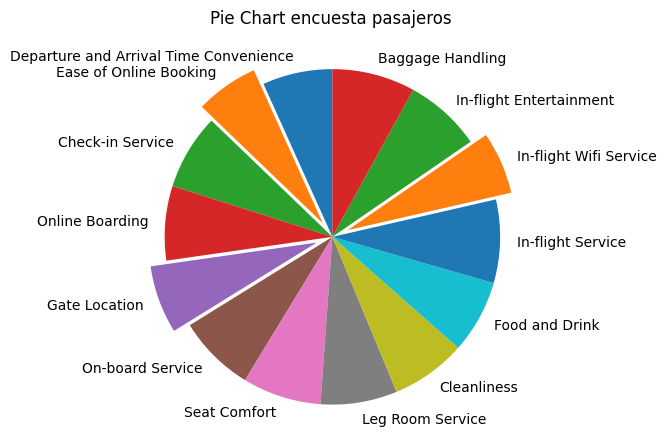

In [19]:
# Parametrización del gráfico
# Resaltar las 3 encuestas menos valoradas
MENORES = [4,1,11]
resaltar=[0.1 if (x in MENORES) else 0 for x in range(len(df_tot))]
explode = resaltar 

# Labels
labels=[x for x in df_tot['Surveys']]

# Datos gráfico
plt.pie(df_tot['Total'], explode=explode, labels=labels, startangle=90)
plt.title('Pie Chart encuesta pasajeros\n')
plt.axis('equal')

# Ploteo
plt.show()

<hr style="border-color:black">

<p style="text-align:center"><b>3D</b></p>
<p>Para realizar la implemtación de un gráfico de este tipo, se va a emplear la libreria <b>Matplotlib</b> por su gran rapidez a la hora de generar gráficos, además, nos va a permitir animar el gráfico para una mayor facilidad de análisis.<br>En esta ocasión, el set de datos a analizar se ha extraído de Kaggle, el cual se refiere a los datos obtenidos de los terremotos de 2010 a 2022. El objetivo, es mostrar la magnitud de los terremotos ocurridos mostrando su latitud y longitud.</p>

In [20]:
# Importaciones Matplotlib

# Va a permitir rotar el gráfico a nuestra voluntad
%matplotlib notebook 
import matplotlib.pyplot as plt

In [21]:
df_0 = pd.read_csv('Earthquake_2010_to_2022_above_6mag.csv')

df_0.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-05-19T10:13:31.721Z,-54.1373,159.0844,10.00,6.9,mww,NaN,39.0,0.369,0.94,...,2022-05-21T12:51:07.224Z,Macquarie Island region,earthquake,4.1,1.7,0.078,16.0,reviewed,us,us
1,2022-05-10T23:06:32.600Z,-23.5057,-66.6499,220.00,6.8,mww,NaN,30.0,1.510,0.95,...,2022-05-20T19:07:35.091Z,"85 km NNW of San Antonio de los Cobres, Argentina",earthquake,8.9,1.9,0.062,25.0,reviewed,us,us
2,2022-05-09T22:33:06.817Z,-3.3520,146.3603,10.00,6.3,mww,NaN,35.0,5.709,0.85,...,2022-05-19T02:22:12.169Z,"177 km SW of Lorengau, Papua New Guinea",earthquake,7.9,1.7,0.054,33.0,reviewed,us,us
3,2022-05-09T06:23:03.133Z,24.0222,122.5011,27.02,6.3,mww,NaN,35.0,0.642,0.54,...,2022-05-13T23:52:57.377Z,"70 km SW of Yonakuni, Japan",earthquake,5.5,1.0,0.075,17.0,reviewed,us,us
4,2022-05-05T08:21:16.209Z,6.5386,127.1428,21.69,6.0,mww,NaN,72.0,1.640,0.52,...,2022-05-06T08:26:20.635Z,"95 km ESE of Lukatan, Philippines",earthquake,7.5,3.9,0.043,51.0,reviewed,us,us


<p style="font-size:12px"><b>Fuente: </b><a href="https://www.kaggle.com/datasets/chandrimad31/earthquakes-20102022-above-6-richter-magnitude">Kaggle</a></p>

In [22]:
df_0.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

De todo el set de datos, las columnas que nos interesa va a ser aquellas de longitud, latitud y magnitud del terremoto.

In [23]:
# Eliminar las columnas que no tienen un dato de puntuación. Interesa los "int64"
df = df_0.select_dtypes(exclude=['object'])
# Eliminar las columnas con tipo de dato deseado pero no datos deseados
df=df[['latitude','longitude','mag']]

df.head()

,latitude,longitude,mag
0,-54.1373,159.0844,6.9
1,-23.5057,-66.6499,6.8
2,-3.3520,146.3603,6.3
3,24.0222,122.5011,6.3
4,6.5386,127.1428,6.0


<IPython.core.display.Javascript object>


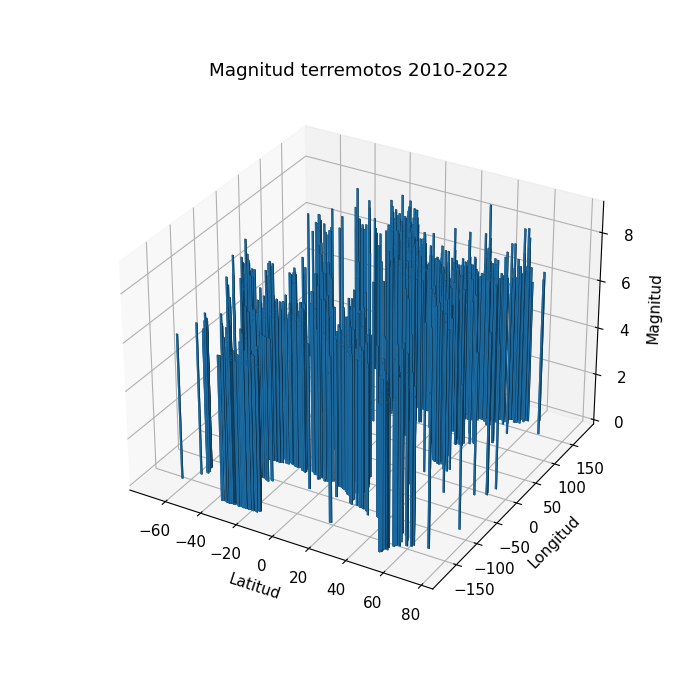

In [24]:
# Creación del area de la figura a plotear
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')

# Segmentación de los datos en los diferentes parámetros necesarios
X=np.asarray(list(df['latitude']))
Y=np.asarray(list(df['longitude']))
Z=np.asarray(list(df['mag']))
# Creación de la gráfica
ax.bar3d(X, Y, 0, 1, 1, Z, shade=True)
# Parametrización del área del gráfico
ax.set_xlabel('Latitud')
ax.set_ylabel('Longitud')
ax.set_zlabel('Magnitud')
ax.set_title('Magnitud terremotos 2010-2022')

plt.show()